In [14]:
import sys
import numpy as np
import h5py
import matplotlib
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d 

matplotlib.rcParams['text.usetex']    = True
matplotlib.rcParams['font.family']    = 'serif'
matplotlib.rcParams['font.size']      = '16'
matplotlib.rcParams['figure.figsize'] = 6.4, 4.8

In [21]:
APR = h5py.File('../output/APR_Cat_1.4.hdf5','r')
print(APR.keys())

<KeysViewHDF5 ['1s0n_N100', '1s0n_N1000', '1s0n_N10000', '1s0n_N262145', '1s0n_gsl', 'E', 'T_interp', 'Tcn_interp', 'r_interp', 'raw_T', 'raw_Tcn', 'raw_Tcp', 'raw_dvdr', 'raw_dvol', 'raw_ephi', 'raw_rT', 'raw_rTc', 'raw_state']>


In [22]:
E = APR['E'][:]
spec_1s0n_N100 = APR['1s0n_N100'][:]
spec_1s0n_N1000 = APR['1s0n_N1000'][:]
spec_1s0n_N10000 = APR['1s0n_N10000'][:]
spec_1s0n_N262145 = APR['1s0n_N262145'][:]
spec_1s0n_gsl = APR['1s0n_gsl'][:]

raw_rT = APR['raw_rT'][:]
raw_T = APR['raw_T'][:]
raw_ephi = APR['raw_ephi'][:]
raw_dvol = APR['raw_dvol'][:]
raw_dvdr = APR['raw_dvdr'][:]

raw_rTc = APR['raw_rTc'][:]
raw_Tcn = APR['raw_Tcn'][:]
raw_Tcp = APR['raw_Tcp'][:]
raw_state = APR['raw_state'][:]

r_interp = APR['r_interp'][:]
Tcn_interp = APR['Tcn_interp'][:]
T_interp = APR['T_interp'][:]

Text(0, 0.5, '$dV/dr$')

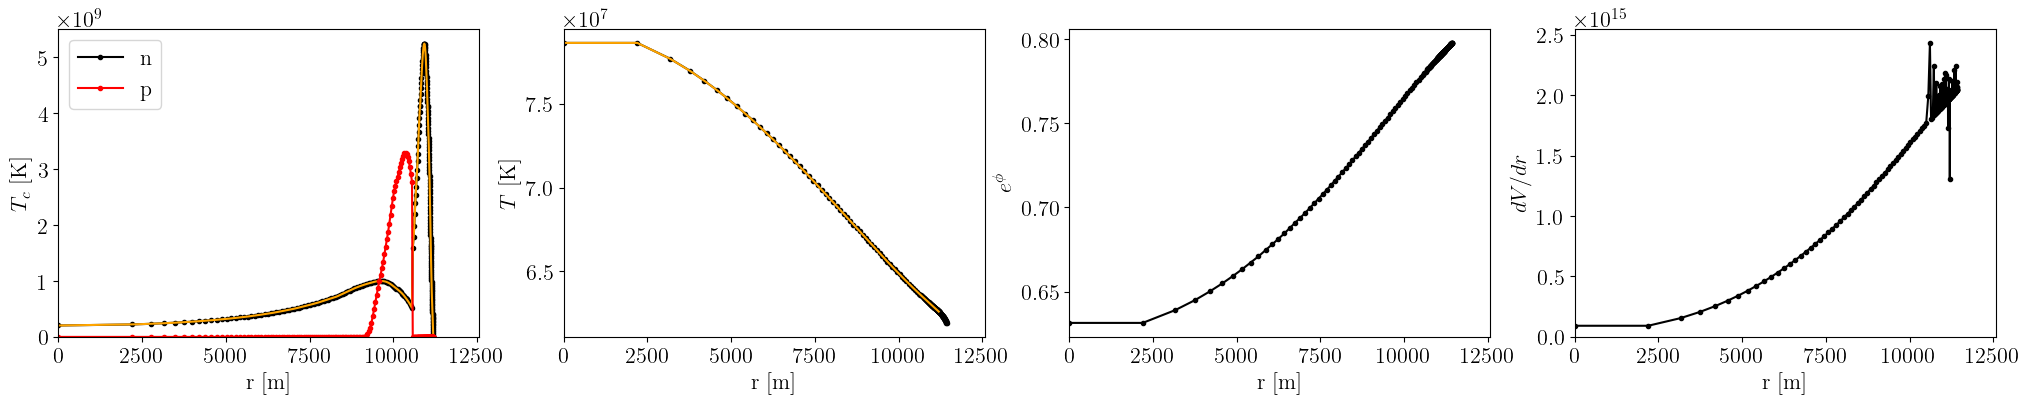

In [23]:
fig, ax = plt.subplots(figsize=(25,4), ncols=4)

ax[0].plot(raw_rTc, raw_Tcn, marker='.', label='n', color='black')
ax[0].plot(r_interp, Tcn_interp, marker='', color='orange')
ax[0].plot(raw_rTc, raw_Tcp, marker='.', label='p', color='red')
ax[0].legend()

ax[1].plot(raw_rT, raw_T, marker='.', color='black')
ax[1].plot(r_interp, T_interp, marker='', color='orange')

ax[2].plot(raw_rT, raw_ephi, marker='.', color='black')

ax[3].plot(raw_rT, raw_dvdr, marker='.', color='black')

for i in [0,1,2,3]:
    ax[i].set_xlim(0, np.max(raw_rT)*1.1)
    ax[i].set_xlabel(r'r [m]')

ax[0].set_ylim(0,)
ax[3].set_ylim(0,)
ax[0].set_ylabel(r'$T_c$ [K]')
ax[1].set_ylabel(r'$T$ [K]')
ax[2].set_ylabel(r'$e^{\phi}$')
ax[3].set_ylabel(r'$dV/dr$')

Text(0, 0.5, '$\\frac{1}{N_{a,\\mathrm{PBF}}}\\frac{d\\epsilon}{dE}$')

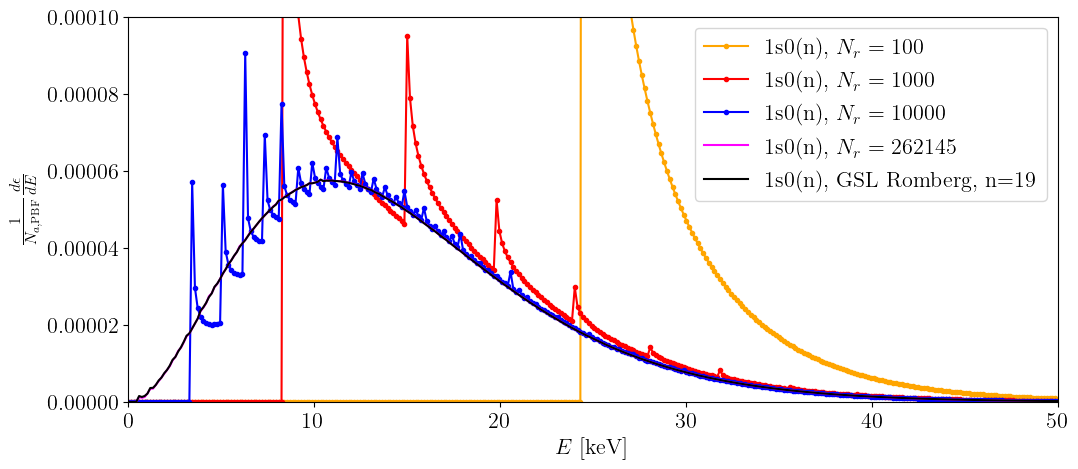

In [24]:
fig, ax = plt.subplots(figsize=(12,5))
ax.plot(E, spec_1s0n_N100, marker='.', label=r'1s0(n), $N_r=100$', color='orange')
ax.plot(E, spec_1s0n_N1000, marker='.', label='1s0(n), $N_r=1000$', color='red')
ax.plot(E, spec_1s0n_N10000, marker='.', label='1s0(n), $N_r=10000$', color='blue')
ax.plot(E, spec_1s0n_N262145, marker='', label='1s0(n), $N_r=262145$', color='magenta')

ax.plot(E, spec_1s0n_gsl, marker='', label='1s0(n), GSL Romberg, n=19', color='black')
plt.legend()
plt.ylim(0,1e-4)
plt.xlim(np.min(E), 50)
plt.xlabel(r'$E$ [keV]')
plt.ylabel(r'$\frac{1}{N_{a,\mathrm{PBF}}}\frac{d\epsilon}{dE}$')

#plt.yscale('log')
#plt.ylim(1e-18,)

Text(0, 0.5, '$\\frac{1}{N_{a,\\mathrm{PBF}}}\\frac{d\\epsilon}{dE}$')

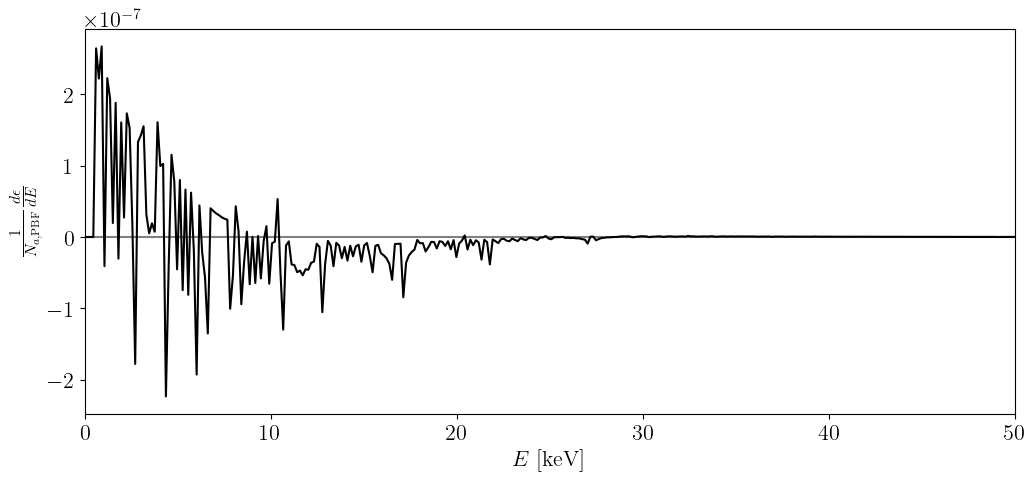

In [25]:
fig, ax = plt.subplots(figsize=(12,5))
plt.axhline(0, color='gray')
ax.plot(E, spec_1s0n_gsl - spec_1s0n_N262145, marker='', label='difference', color='black')
#plt.ylim(0,6e-5)
plt.xlim(np.min(E), 50)
plt.xlabel(r'$E$ [keV]')
plt.ylabel(r'$\frac{1}{N_{a,\mathrm{PBF}}}\frac{d\epsilon}{dE}$')

Text(0, 0.5, '$\\frac{1}{N_{a,\\mathrm{PBF}}}\\frac{d\\epsilon}{dE}$')

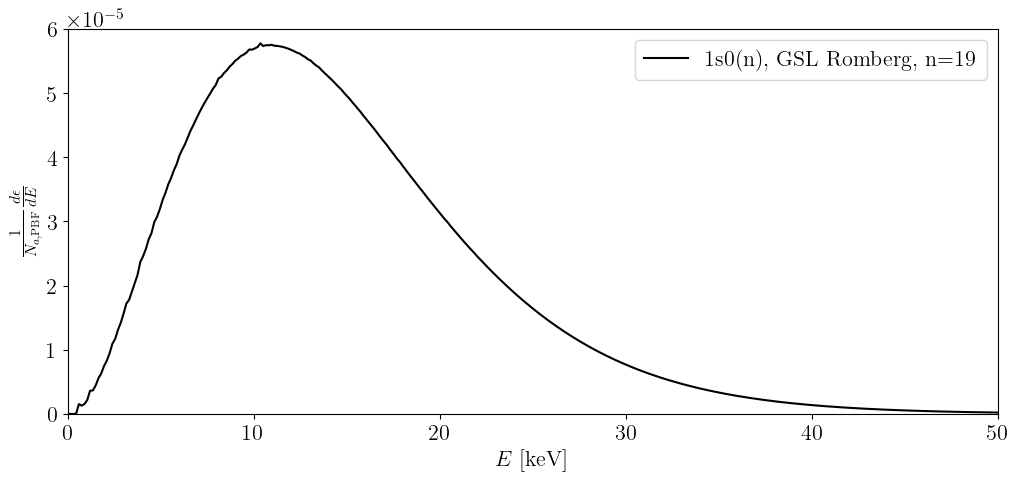

In [26]:
fig, ax = plt.subplots(figsize=(12,5))
ax.plot(E, spec_1s0n_gsl, marker='', label='1s0(n), GSL Romberg, n=19', color='black')
plt.legend()
plt.ylim(0,6e-5)
plt.xlim(np.min(E), 50)
plt.xlabel(r'$E$ [keV]')
plt.ylabel(r'$\frac{1}{N_{a,\mathrm{PBF}}}\frac{d\epsilon}{dE}$')

#plt.yscale('log')
#plt.ylim(1e-18,)